In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

In [5]:
import pickle

data = {}
data['Normal'] = pickle.load(open('predictions/normal-sparse-static-normalised.pkl','r'))
data['Transfer L21'] = pickle.load(open('predictions/transfer-sparse-static-normalised.pkl','r'))
data['Transfer L1'] = pickle.load(open('predictions/transfer-sparse-static-normalised.pkl','r'))

data['Joint'] = pickle.load(open('predictions/global-sparse-static-normalised.pkl','r'))

In [6]:
data['Normal']

{None: {0: {2: {0: {'dw': {10: 3.0568186897265308,
      50: 1.9482629812218404,
      90: 1.9121768435692572},
     'fridge': {10: 7.917137287119858,
      50: 6.9239602869357819,
      90: 7.2139815596511676},
     'hvac': {10: 19.519828707162691,
      50: 16.606736839229526,
      90: 17.119213081714683},
     'mw': {10: 1.8160280954087074,
      50: 1.7538997205855307,
      90: 1.9196383173892921},
     'oven': {10: 2.4293844825795947,
      50: 2.3990247904495776,
      90: 2.1610901065023516},
     'wm': {10: 1.2370157857834769,
      50: 0.7903315893366325,
      90: 0.81879100680944239}},
    1: {'dw': {10: 1.8852661525812886,
      50: 2.0807022793462209,
      90: 1.8788778504166153},
     'fridge': {10: 8.057098888518448,
      50: 7.027535190371677,
      90: 6.5019888361458467},
     'hvac': {10: 20.538533442611339,
      50: 21.572688124284081,
      90: 16.698444931707144},
     'mw': {10: 2.1525937296864375,
      50: 1.7886193730077853,
      90: 1.6443567521567461},

In [7]:
from create_matrix import *

from tensor_custom_core import *
from create_matrix import *
from tensor_custom_core import *
from degree_days import dds
appliance_index = {appliance: APPLIANCES_ORDER.index(appliance) for appliance in APPLIANCES_ORDER}

In [8]:
best_params = {
    'Normal':{'Without':0.1, 'With':0.01},
    'Transfer L21':{'Without':0.1, 'With':0.001},
    'Transfer L1':{'Without':0.01, 'With':0.01},
    'Joint':{'Without':0,'With':0.001}
}

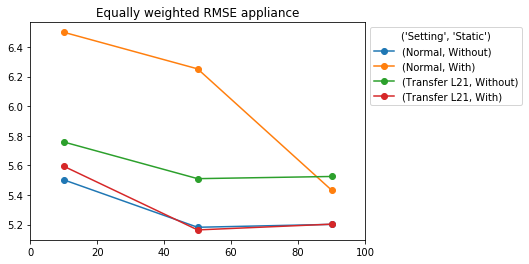

In [17]:

for setting in ['Normal','Transfer L21']:
#for setting in ['Transfer L21', 'Transfer L1', 'Joint']:
    for static in ['Without', 'With']:
        if static=='Without':
            static_param = None
        else:
            static_param = 'static'
        df = pd.Panel(data[setting][static_param][best_params[setting][static]][2]).mean(axis=0)
        
        df.mean(axis=1).plot( label=(setting, static), marker='o')
plt.xlim((0, 100))
plt.legend(bbox_to_anchor=(1,1), title=('Setting', 'Static'))
plt.title("Equally weighted RMSE appliance")

In [34]:
['{}_{}'.format(appliance, month) for month in range(1, 13)]

['hvac_1',
 'hvac_2',
 'hvac_3',
 'hvac_4',
 'hvac_5',
 'hvac_6',
 'hvac_7',
 'hvac_8',
 'hvac_9',
 'hvac_10',
 'hvac_11',
 'hvac_12']

In [44]:
r_df = create_matrix_single_region('SanDiego', 2014)[0]
contri = {}
for appliance in APPLIANCES_ORDER[1:]:
    df_app = r_df[['{}_{}'.format(appliance, month) for month in range(5, 11)]]
    df_agg = r_df[['{}_{}'.format("aggregate", month) for month in range(5, 11)]]
    df_app.columns = df_agg.columns
    contri[appliance] = df_app.div(df_agg).mean().mean()

In [50]:
error_weights = pd.Series(contri).div(pd.Series(contri).sum()).to_dict()


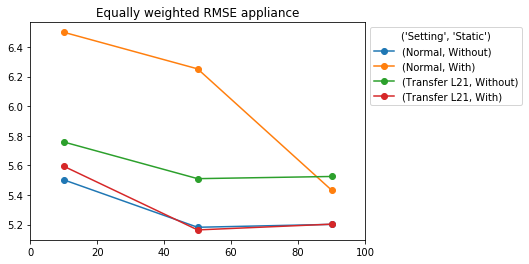

In [51]:

for setting in ['Normal','Transfer L21']:
#for setting in ['Transfer L21', 'Transfer L1', 'Joint']:
    for static in ['Without', 'With']:
        if static=='Without':
            static_param = None
        else:
            static_param = 'static'
        df = pd.Panel(data[setting][static_param][best_params[setting][static]][2]).mean(axis=0)
        
        df.mean(axis=1).plot( label=(setting, static), marker='o')
plt.xlim((0, 100))
plt.legend(bbox_to_anchor=(1,1), title=('Setting', 'Static'))
plt.title("Equally weighted RMSE appliance")

10    2.126304
50    1.904050
90    1.935567
dtype: float64

In [54]:
pd.DataFrame({'a':[1, 3], 'b':[5, 4]})*pd.DataFrame({'a':[1, 3], 'b':[5, 4]})

,a,b
0,1,25
1,9,16


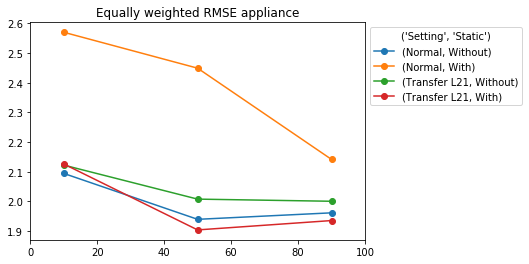

In [60]:

for setting in ['Normal','Transfer L21']:
#for setting in ['Transfer L21', 'Transfer L1', 'Joint']:
    for static in ['Without', 'With']:
        if static=='Without':
            static_param = None
        else:
            static_param = 'static'
        df = pd.Panel(data[setting][static_param][best_params[setting][static]][2]).mean(axis=0)
        
        (pd.DataFrame(error_weights, index=[10, 50, 90])*df).mean(axis=1).plot( label=(setting, static), marker='o')
plt.xlim((0, 100))
plt.legend(bbox_to_anchor=(1,1), title=('Setting', 'Static'))
plt.title("Equally weighted RMSE appliance")

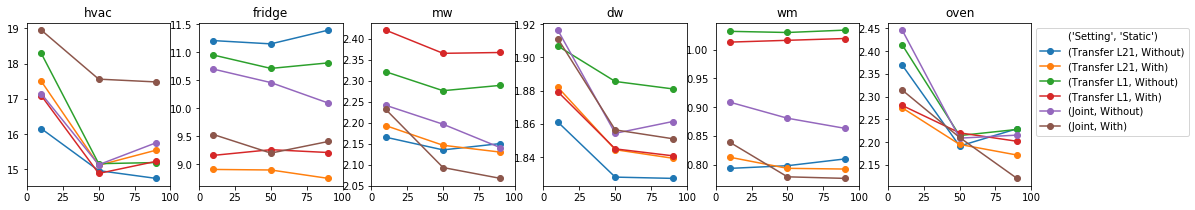

In [11]:
fig, ax = plt.subplots(figsize=(18, 3), ncols=6)
#for setting in ['Normal','Transfer L21', 'Transfer L1','Joint']:
for setting in ['Transfer L21', 'Transfer L1', 'Joint']:
    for static in ['Without', 'With']:
        if static=='Without':
            static_param = None
        else:
            static_param = 'static'
        df = pd.Panel(data[setting][static_param][best_params[setting][static]][2]).mean(axis=0)
        for i, appliance in enumerate(APPLIANCES_ORDER[1:]):
            df[appliance].plot(ax=ax[i], title=appliance, label=(setting, static), marker='o')
            ax[i].set_xlim((0, 100))
plt.legend(bbox_to_anchor=(1,1), title=('Setting', 'Static'))

In [ ]:
pd.Panel(data['Normal']['static'][best_params['Normal']['With']][2]).mean(axis=0)

In [48]:
pd.Panel(data['Normal'][None][best_params['Normal']['With']][2]).mean(axis=0)

,dw,fridge,hvac,mw,oven,wm
10,2.102761,7.859291,19.301613,2.100703,2.441842,1.032927
50,1.984041,7.444513,16.676890,1.820663,2.226688,0.739819
90,1.932113,6.806438,16.303977,1.676773,2.116843,0.711745
